In [1]:
from google.colab import files
uploaded=files.upload()

Saving HistoricalData_CSCO.csv to HistoricalData_CSCO.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import io
stock=pd.read_csv(io.BytesIO(uploaded['HistoricalData_CSCO.csv']))

In [3]:
stock.head()


,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$54.02,14861230,$54.18,$54.42,$53.935
1,06/08/2021,$54.13,15329690,$53.97,$54.39,$53.89
2,06/07/2021,$53.92,14899750,$54.32,$54.44,$53.79
3,06/04/2021,$54.07,11676700,$53.435,$54.17,$53.435
4,06/03/2021,$53.33,17593100,$52.8,$53.555,$52.62


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


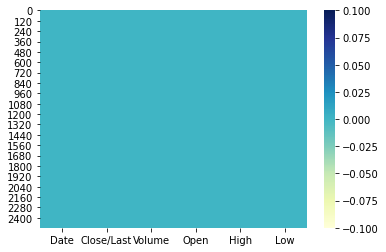

In [5]:
import seaborn as sns
sns.heatmap(stock.isnull(),cmap='YlGnBu')

In [6]:
stock.rename(columns={'Close/Last':'Close'}, inplace=True)

In [7]:
stock.Close=stock.Close.str.replace('$',' ')
stock.Open=stock.Open.str.replace('$',' ')
stock.High=stock.High.str.replace('$',' ')
stock.Low=stock.Low.str.replace('$',' ')

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2516 non-null   object
 1   Close   2516 non-null   object
 2   Volume  2516 non-null   int64 
 3   Open    2516 non-null   object
 4   High    2516 non-null   object
 5   Low     2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [9]:
stock[['Close','Open','High','Low']]=stock[['Close','Open','High','Low']].apply(pd.to_numeric)

In [10]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Close   2516 non-null   float64
 2   Volume  2516 non-null   int64  
 3   Open    2516 non-null   float64
 4   High    2516 non-null   float64
 5   Low     2516 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [11]:
stock['data_parsed'] = pd.to_datetime(stock['Date'], format="%m/%d/%Y")

In [12]:
stock['data_parsed'].head()

0   2021-06-09
1   2021-06-08
2   2021-06-07
3   2021-06-04
4   2021-06-03
Name: data_parsed, dtype: datetime64[ns]

In [13]:
stock.drop('Date',axis=1,inplace=True)

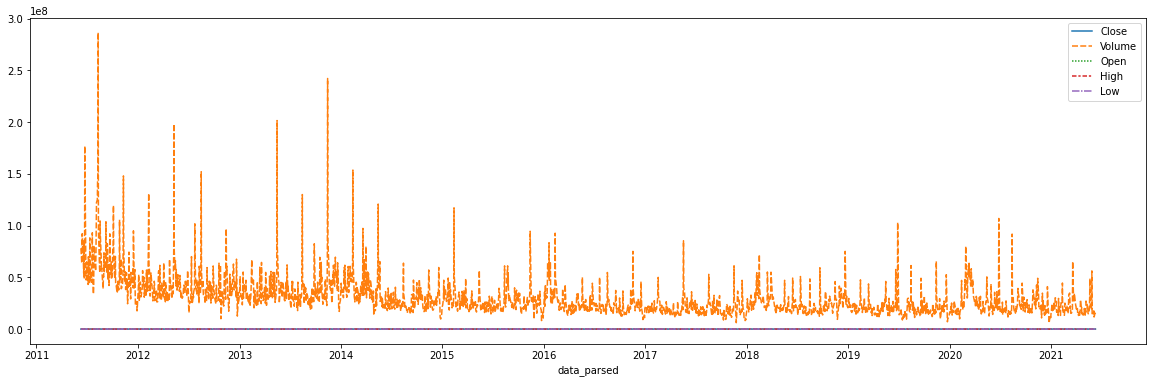

In [14]:
stock.index=stock['data_parsed']
plt.figure(figsize=(20,6))
sns.lineplot(data=stock)

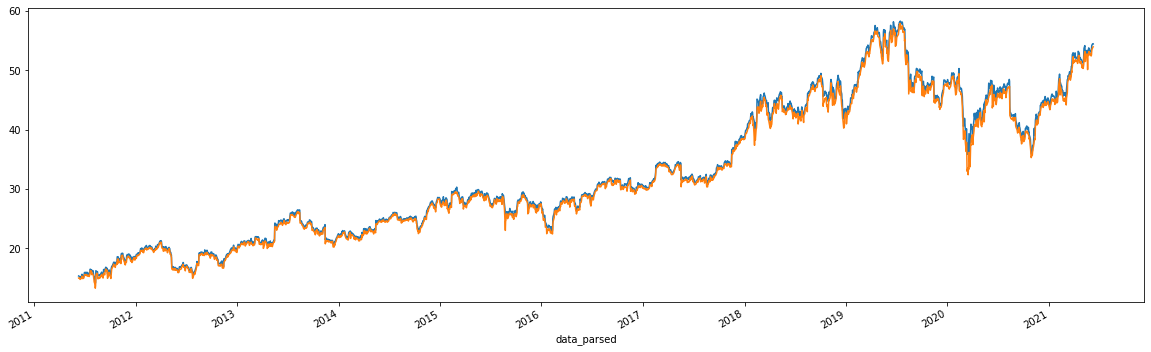

In [15]:
stock['High'].plot(figsize=(20,6))
stock['Low'].plot(figsize=(20,6))
plt.show()

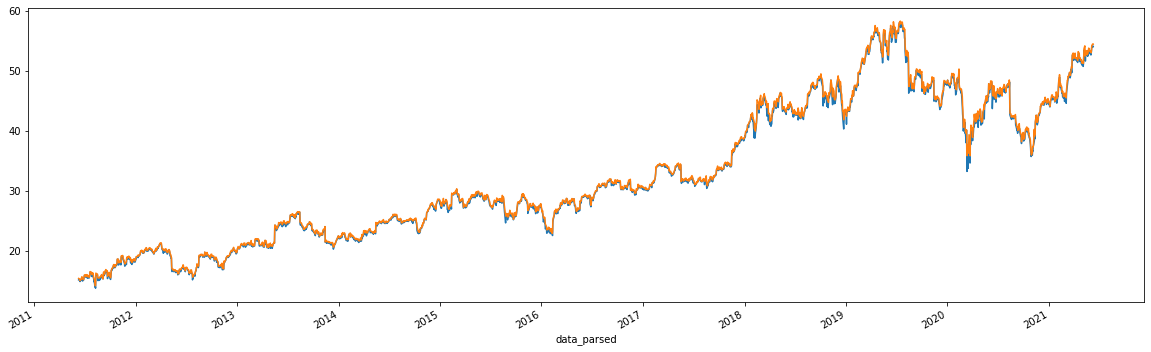

In [16]:
stock['Close'].plot(figsize=(20,6))
stock['High'].plot(figsize=(20,6))
plt.show()

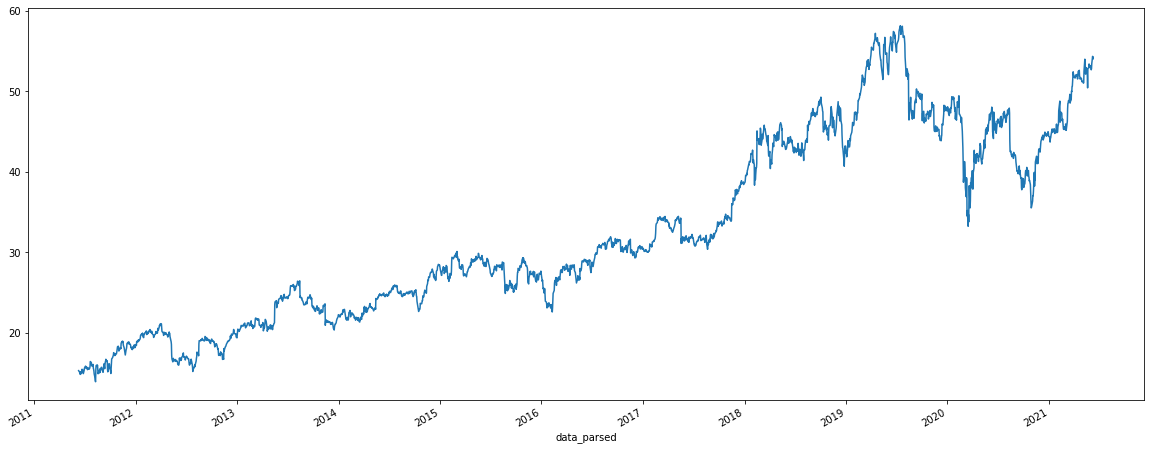

In [18]:
stock['Open'].plot(figsize=(20,8))
plt.show()

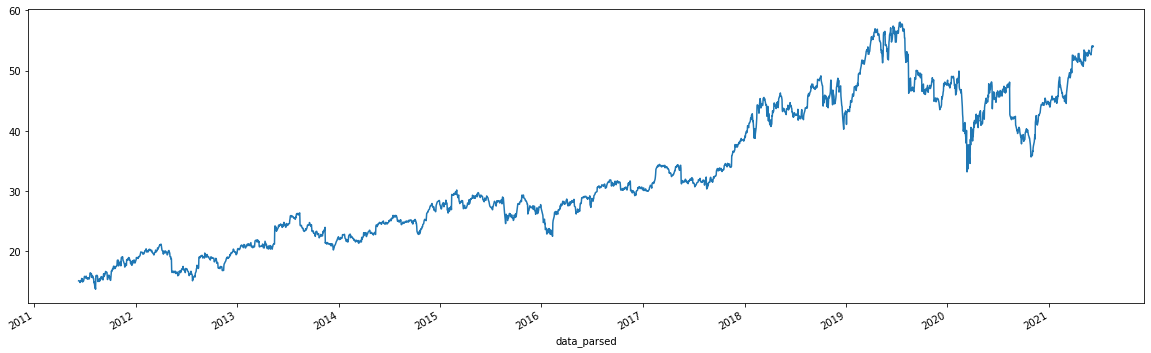

In [19]:
stock['Close'].plot(figsize=(20,6))
plt.show()

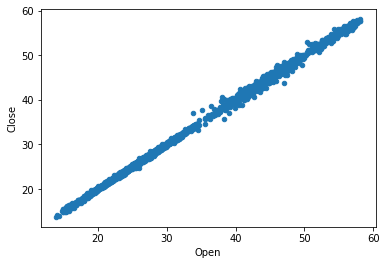

In [17]:
stock.plot.scatter(x="Open",y="Close")
plt.show()